In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [90]:
file_crime =Path("Resources/crime_data.csv")
crime_data = pd.read_csv(file_crime, encoding="ISO-8859-1")

crime_data.head()

,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,3,0,2,1,1,1.0,2.0,1.0,2.0,2.0,2.0,1.0
1,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,1,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,0,2,2,3,2.0,0.0,1.0,2.0,0.0,0.0,0.0
3,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,2,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
crime_data = crime_data.drop(columns=['Clave_Ent', 'Subtipo de delito', 'Modalidad','Bien jurídico afectado'])
crime_data.head()

,Año,Entidad,Tipo de delito,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,Aguascalientes,Homicidio,3,0,2,1,1,1.0,2.0,1.0,2.0,2.0,2.0,1.0
1,2015,Aguascalientes,Homicidio,1,1,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2015,Aguascalientes,Homicidio,0,0,2,2,3,2.0,0.0,1.0,2.0,0.0,0.0,0.0
3,2015,Aguascalientes,Homicidio,2,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,Aguascalientes,Homicidio,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
crime_data = pd.DataFrame(crime_data)


crime_data['Total Delitos por Mes'] = crime_data[['Enero', 'Febrero', 'Marzo', 'Abril', 
                                                    'Mayo', 'Junio', 'Julio', 'Agosto', 
                                                    'Septiembre', 'Octubre', 'Noviembre', 
                                                    'Diciembre']].sum(axis=1)


crime_data

,Año,Entidad,Tipo de delito,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total Delitos por Mes
0,2015,Aguascalientes,Homicidio,3,0,2,1,1,1.0,2.0,1.0,2.0,2.0,2.0,1.0,18.0
1,2015,Aguascalientes,Homicidio,1,1,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0
2,2015,Aguascalientes,Homicidio,0,0,2,2,3,2.0,0.0,1.0,2.0,0.0,0.0,0.0,12.0
3,2015,Aguascalientes,Homicidio,2,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,2015,Aguascalientes,Homicidio,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25083,2022,Zacatecas,Falsificación,5,14,7,10,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0
25084,2022,Zacatecas,Contra el medio ambiente,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
25085,2022,Zacatecas,Delitos cometidos por servidores públicos,12,26,45,84,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.0
25086,2022,Zacatecas,Electorales,5,1,3,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0


In [93]:
crime_data.fillna(0, inplace=True)

grouped_df = crime_data.groupby(['Entidad', 'Tipo de delito']).agg({
    'Enero': 'sum',
    'Febrero': 'sum',
    'Marzo': 'sum',
    'Abril': 'sum',
    'Mayo': 'sum',
    'Junio': 'sum',
    'Julio': 'sum',
    'Agosto': 'sum',
    'Septiembre': 'sum',
    'Octubre': 'sum',
    'Noviembre': 'sum',
    'Diciembre': 'sum'
}).reset_index()

# Calcular el Total de Delitos por Mes
grouped_df['Total Delitos'] = grouped_df.iloc[:, 2:].sum(axis=1)

# Mostrar el DataFrame agrupado
print("\nDataFrame Agrupado por Estado y Tipo de Delito:")
grouped_df


DataFrame Agrupado por Estado y Tipo de Delito:


,Entidad,Tipo de delito,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total Delitos
0,Aguascalientes,Aborto,6,4,1,6,8,5.0,7.0,2.0,4.0,4.0,4.0,4.0,55.0
1,Aguascalientes,Abuso de confianza,356,381,410,365,423,381.0,425.0,437.0,412.0,409.0,377.0,273.0,4649.0
2,Aguascalientes,Abuso sexual,7,4,0,2,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,19.0
3,Aguascalientes,Acoso sexual,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aguascalientes,Allanamiento de morada,231,232,305,272,334,234.0,249.0,255.0,241.0,236.0,238.0,225.0,3052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,Zacatecas,Tráfico de menores,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1276,Zacatecas,Violación equiparada,41,57,76,62,88,58.0,48.0,54.0,73.0,49.0,51.0,42.0,699.0
1277,Zacatecas,Violación simple,74,102,117,89,112,98.0,77.0,103.0,94.0,92.0,81.0,60.0,1099.0
1278,Zacatecas,Violencia de género en todas sus modalidades d...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
crime_data.fillna(0, inplace=True)

grouped_df_2 = crime_data.groupby(['Entidad', 'Tipo de delito', 'Año']).agg({
    'Enero': 'sum',
    'Febrero': 'sum',
    'Marzo': 'sum',
    'Abril': 'sum',
    'Mayo': 'sum',
    'Junio': 'sum',
    'Julio': 'sum',
    'Agosto': 'sum',
    'Septiembre': 'sum',
    'Octubre': 'sum',
    'Noviembre': 'sum',
    'Diciembre': 'sum'
}).reset_index()

# Calcular el Total de Delitos por Mes
grouped_df_2['Total Delitos'] = grouped_df.iloc[:, 3:].sum(axis=1)

# Mostrar el DataFrame agrupado
print("\nDataFrame Agrupado por Estado, Tipo de Delito y Año:")
grouped_df_2


DataFrame Agrupado por Estado, Tipo de Delito y Año:


,Entidad,Tipo de delito,Año,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total Delitos
0,Aguascalientes,Aborto,2015,0,3,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,104.0
1,Aguascalientes,Aborto,2016,1,0,0,2,1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,8942.0
2,Aguascalientes,Aborto,2017,0,0,0,0,1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,31.0
3,Aguascalientes,Aborto,2018,2,0,0,1,0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,Aguascalientes,Aborto,2019,0,0,0,2,2,0.0,1.0,0.0,1.0,2.0,2.0,0.0,5873.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,Zacatecas,Violencia familiar,2018,128,149,177,196,187,188.0,186.0,195.0,195.0,220.0,162.0,168.0,NaN
10236,Zacatecas,Violencia familiar,2019,153,186,244,215,269,252.0,248.0,257.0,231.0,245.0,260.0,234.0,NaN
10237,Zacatecas,Violencia familiar,2020,246,237,288,245,262,363.0,291.0,323.0,266.0,266.0,285.0,244.0,NaN
10238,Zacatecas,Violencia familiar,2021,249,302,348,331,353,318.0,274.0,289.0,246.0,273.0,243.0,227.0,NaN


In [95]:

crime_data.fillna(0, inplace=True)

month_columns = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 
                 'Junio', 'Julio', 'Agosto', 'Septiembre', 
                 'Octubre', 'Noviembre', 'Diciembre']

for month in month_columns:
    crime_data[month] = pd.to_numeric(crime_data[month], errors='coerce')  # Convertir a numérico, reemplaza errores con NaN

# Agrupar por 'Entidad', 'Tipo de delito' y 'Año', y sumar los delitos por mes
grouped_df_2 = crime_data.groupby(['Entidad', 'Tipo de delito', 'Año']).agg({
    'Enero': 'sum',
    'Febrero': 'sum',
    'Marzo': 'sum',
    'Abril': 'sum',
    'Mayo': 'sum',
    'Junio': 'sum',
    'Julio': 'sum',
    'Agosto': 'sum',
    'Septiembre': 'sum',
    'Octubre': 'sum',
    'Noviembre': 'sum',
    'Diciembre': 'sum'
}).reset_index()

# Calcular el Total de Delitos por Mes
grouped_df_2['Total Delitos'] = grouped_df_2.iloc[:, 3:].sum(axis=1)

print("\nDataFrame Agrupado por Estado, Tipo de Delito y Año:")
grouped_df_2


DataFrame Agrupado por Estado, Tipo de Delito y Año:


,Entidad,Tipo de delito,Año,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total Delitos
0,Aguascalientes,Aborto,2015,0,3,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0
1,Aguascalientes,Aborto,2016,1,0,0,2,1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,7.0
2,Aguascalientes,Aborto,2017,0,0,0,0,1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0
3,Aguascalientes,Aborto,2018,2,0,0,1,0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,7.0
4,Aguascalientes,Aborto,2019,0,0,0,2,2,0.0,1.0,0.0,1.0,2.0,2.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,Zacatecas,Violencia familiar,2018,128,149,177,196,187,188.0,186.0,195.0,195.0,220.0,162.0,168.0,2151.0
10236,Zacatecas,Violencia familiar,2019,153,186,244,215,269,252.0,248.0,257.0,231.0,245.0,260.0,234.0,2794.0
10237,Zacatecas,Violencia familiar,2020,246,237,288,245,262,363.0,291.0,323.0,266.0,266.0,285.0,244.0,3316.0
10238,Zacatecas,Violencia familiar,2021,249,302,348,331,353,318.0,274.0,289.0,246.0,273.0,243.0,227.0,3453.0


In [96]:
print("Columnas en el DataFrame:")
print(crime_data.columns)

Columnas en el DataFrame:
Index(['Año', 'Entidad', 'Tipo de delito', 'Enero', 'Febrero', 'Marzo',
       'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre',
       'Noviembre', 'Diciembre', 'Total Delitos por Mes'],
      dtype='object')


In [97]:
num_crime_types = crime_data['Tipo de delito'].nunique()

num_crime_types

40

In [98]:

num_crime_types = crime_data.groupby('Tipo de delito')

count_crime_types = num_crime_types['Tipo de delito',].count()

count_crime_types

,Tipo de delito
Tipo de delito,
Aborto,256
Abuso de confianza,256
Abuso sexual,256
Acoso sexual,256
Allanamiento de morada,256
Amenazas,256
Contra el medio ambiente,256
Corrupción de menores,256
Daño a la propiedad,256


In [99]:
total_crimes_by_entity = grouped_df_2.groupby(['Entidad', 'Año']).agg({
    'Enero': 'sum',
    'Febrero': 'sum',
    'Marzo': 'sum',
    'Abril': 'sum',
    'Mayo': 'sum',
    'Junio': 'sum',
    'Julio': 'sum',
    'Agosto': 'sum',
    'Septiembre': 'sum',
    'Octubre': 'sum',
    'Noviembre': 'sum',
    'Diciembre': 'sum'
}).reset_index()

# Calcular el Total de Delitos por Entidad y Año
total_crimes_by_entity['Total Delitos'] = total_crimes_by_entity.iloc[:, 2:].sum(axis=1)


print("\nDataFrame Agrupado por Entidad y Año con Total de Delitos:")
total_crimes_by_entity.head(20)


DataFrame Agrupado por Entidad y Año con Total de Delitos:


,Entidad,Año,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total Delitos
0,Aguascalientes,2015,1855,1816,2009,1978,1936,1979.0,1973.0,1963.0,1919.0,1914.0,1941.0,1929.0,23212.0
1,Aguascalientes,2016,1786,1738,1888,2050,2027,1716.0,2049.0,2065.0,2045.0,2286.0,2025.0,2054.0,23729.0
2,Aguascalientes,2017,2109,1933,2212,2021,2805,3339.0,2962.0,3339.0,3384.0,3409.0,3220.0,2815.0,33548.0
3,Aguascalientes,2018,2982,2864,3327,3427,3572,3075.0,3742.0,3486.0,3118.0,3390.0,2960.0,2891.0,38834.0
4,Aguascalientes,2019,2916,2768,3236,3421,3497,3261.0,3392.0,3464.0,3302.0,3306.0,3054.0,2812.0,38429.0
5,Aguascalientes,2020,3254,3183,3429,2085,2305,2951.0,2924.0,2730.0,2735.0,2917.0,2473.0,2640.0,33626.0
6,Aguascalientes,2021,2789,2730,3263,2979,3149,3041.0,2931.0,3039.0,3069.0,3039.0,2844.0,2772.0,35645.0
7,Aguascalientes,2022,2882,2995,3456,3308,3538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16179.0
8,Baja California,2015,9261,8620,10065,9504,9945,10651.0,10695.0,10861.0,10465.0,10621.0,9731.0,9525.0,119944.0
9,Baja California,2016,9055,9288,9319,9374,9600,8673.0,8424.0,9270.0,8940.0,9544.0,8540.0,9082.0,109109.0


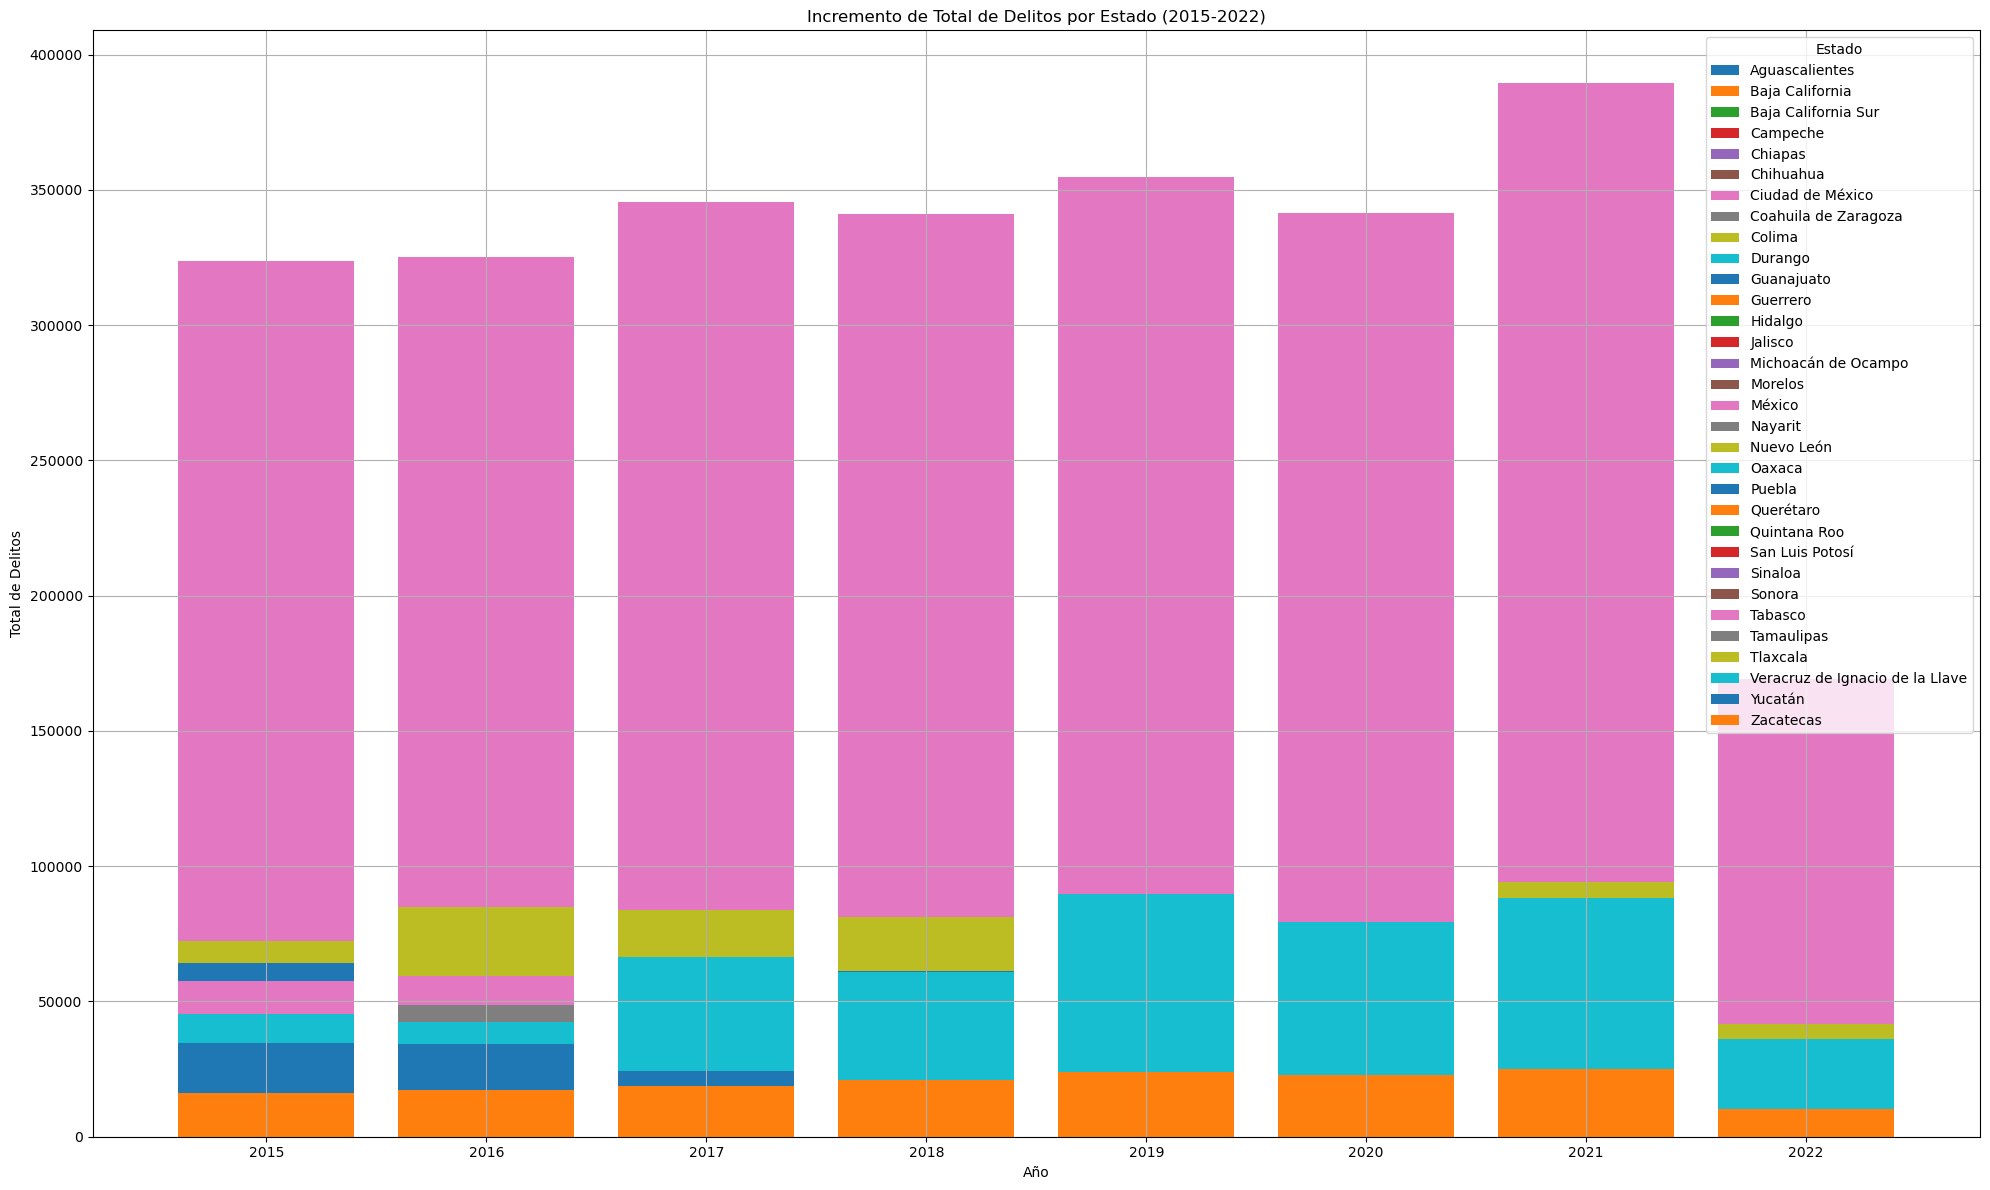

In [100]:
plt.figure(figsize=(20, 12))

# Graficar cada estado
for state in total_crimes_by_entity['Entidad'].unique():
    state_data = total_crimes_by_entity[total_crimes_by_entity['Entidad'] == state]
    plt.bar(state_data['Año'], state_data['Total Delitos'],  label=state)


plt.title('Incremento de Total de Delitos por Estado (2015-2022)')
plt.xlabel('Año')
plt.ylabel('Total de Delitos')
plt.xticks(range(2015, 2023)) 
plt.legend(title='Estado')
plt.grid()
plt.tight_layout()  

# Mostrar la gráfica
plt.show()

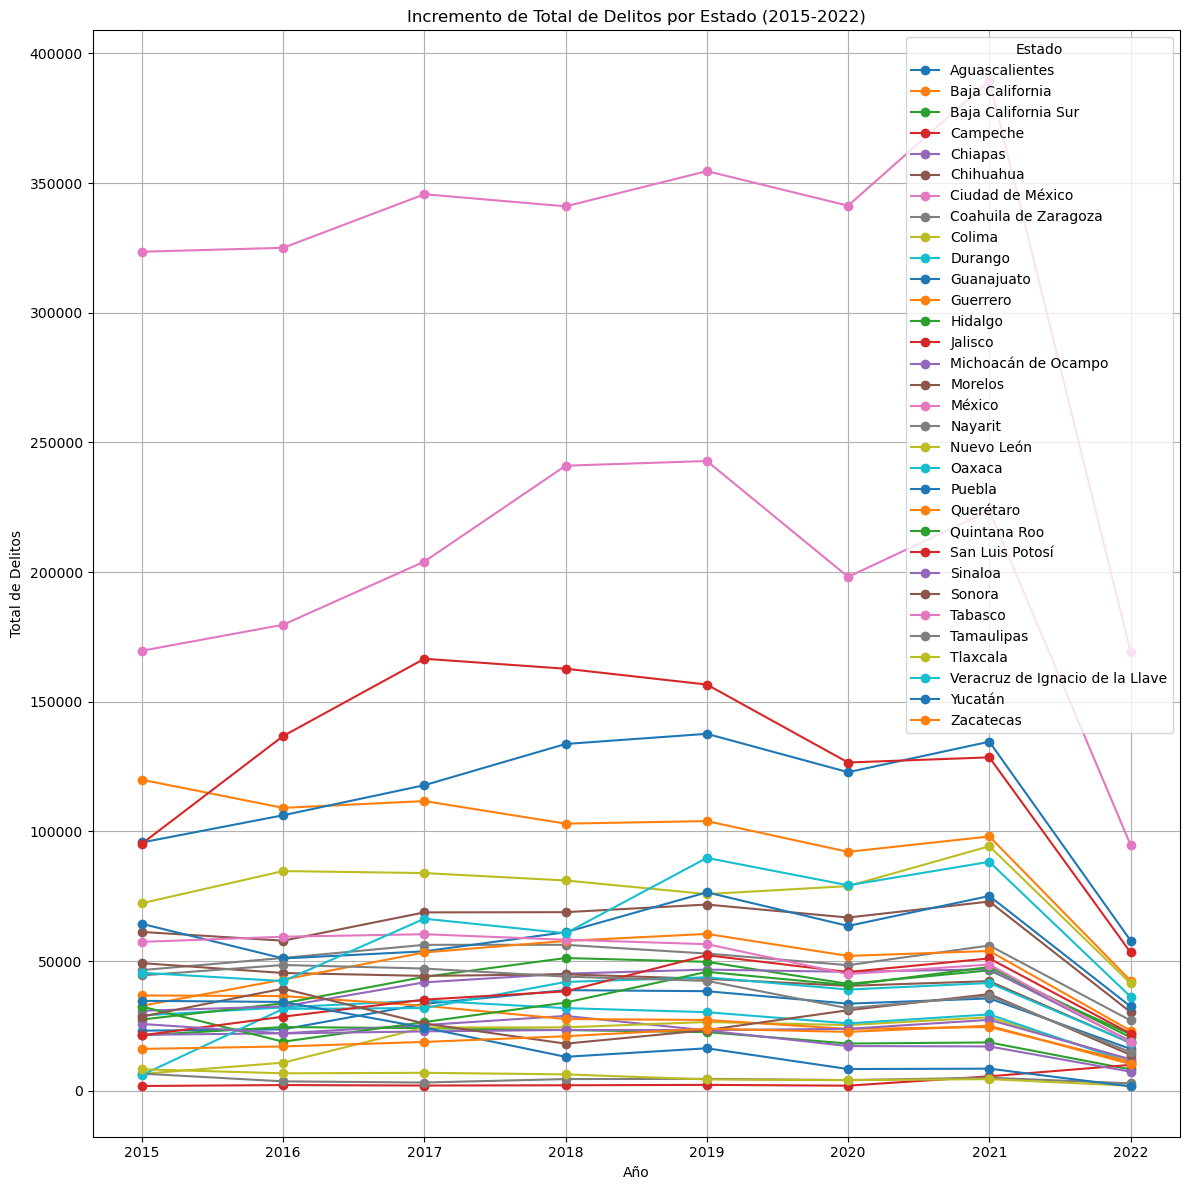

In [101]:
# Crear la gráfica de línea
plt.figure(figsize=(12, 12))

# Graficar cada estado
for state in total_crimes_by_entity['Entidad'].unique():
    state_data = total_crimes_by_entity[total_crimes_by_entity['Entidad'] == state]
    plt.plot(state_data['Año'], state_data['Total Delitos'], marker='o', label=state)


plt.title('Incremento de Total de Delitos por Estado (2015-2022)')
plt.xlabel('Año')
plt.ylabel('Total de Delitos')
plt.xticks(range(2015, 2023)) 
plt.legend(title='Estado')
plt.grid()
plt.tight_layout()  

# Mostrar la gráfica
plt.show()

In [102]:

total_crimes_by_state = total_crimes_by_entity.groupby('Entidad')['Total Delitos'].sum().reset_index()

# Ordenar por Total Delitos de mayor a menor
top_5_states = total_crimes_by_state.nlargest(5, 'Total Delitos')

# Mostrar los 5 estados con más delitos
print("Top 5 Estados con Más Delitos:")
print(top_5_states)

Top 5 Estados con Más Delitos:
             Entidad  Total Delitos
16            México      2589956.0
6   Ciudad de México      1554042.0
13           Jalisco      1026730.0
10        Guanajuato       906771.0
1    Baja California       780562.0


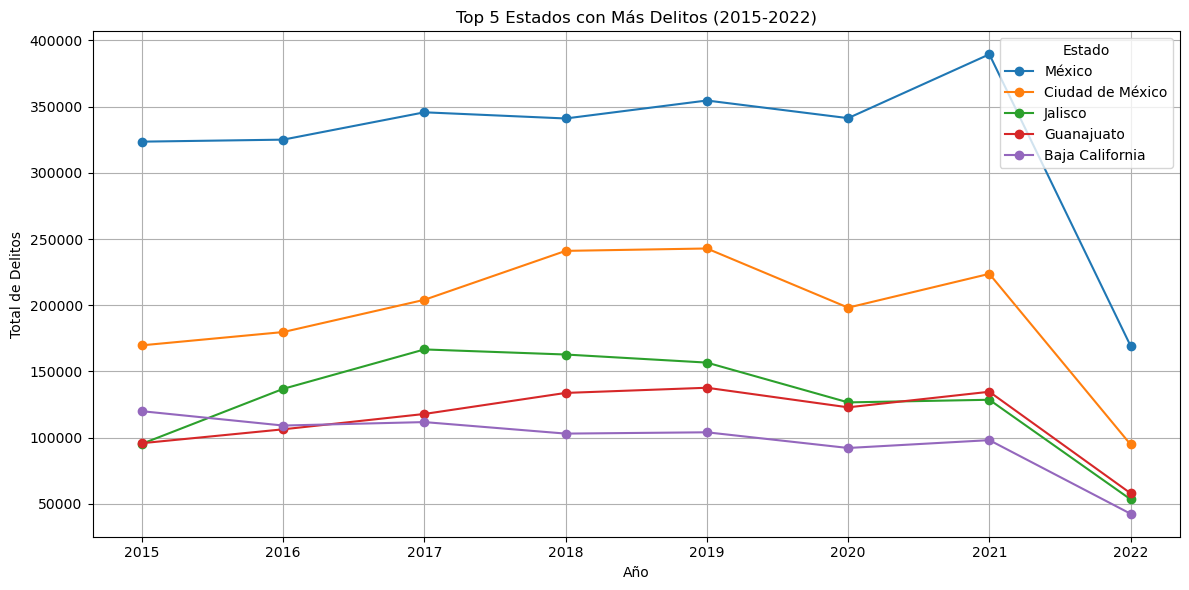

In [103]:
# Crear la gráfica de línea para los 5 estados con más delitos
plt.figure(figsize=(12, 6))

# Graficar cada estado en la selección top 5
for state in top_5_states['Entidad']:
    state_data = total_crimes_by_entity[total_crimes_by_entity['Entidad'] == state]
    plt.plot(state_data['Año'], state_data['Total Delitos'], marker='o', label=state)

plt.title('Top 5 Estados con Más Delitos (2015-2022)')
plt.xlabel('Año')
plt.ylabel('Total de Delitos')
plt.xticks(range(2015, 2023))  
plt.legend(title='Estado')
plt.grid()
plt.tight_layout() 


plt.show()

In [104]:
filtered_crime_data = total_crimes_by_entity[(total_crimes_by_entity['Año'] >= 2015) & (total_crimes_by_entity['Año'] <= 2021)]


print("\nDataFrame Filtrado (2015 a 2021):")
filtered_crime_data.head(20)


DataFrame Filtrado (2015 a 2021):


,Entidad,Año,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total Delitos
0,Aguascalientes,2015,1855,1816,2009,1978,1936,1979.0,1973.0,1963.0,1919.0,1914.0,1941.0,1929.0,23212.0
1,Aguascalientes,2016,1786,1738,1888,2050,2027,1716.0,2049.0,2065.0,2045.0,2286.0,2025.0,2054.0,23729.0
2,Aguascalientes,2017,2109,1933,2212,2021,2805,3339.0,2962.0,3339.0,3384.0,3409.0,3220.0,2815.0,33548.0
3,Aguascalientes,2018,2982,2864,3327,3427,3572,3075.0,3742.0,3486.0,3118.0,3390.0,2960.0,2891.0,38834.0
4,Aguascalientes,2019,2916,2768,3236,3421,3497,3261.0,3392.0,3464.0,3302.0,3306.0,3054.0,2812.0,38429.0
5,Aguascalientes,2020,3254,3183,3429,2085,2305,2951.0,2924.0,2730.0,2735.0,2917.0,2473.0,2640.0,33626.0
6,Aguascalientes,2021,2789,2730,3263,2979,3149,3041.0,2931.0,3039.0,3069.0,3039.0,2844.0,2772.0,35645.0
8,Baja California,2015,9261,8620,10065,9504,9945,10651.0,10695.0,10861.0,10465.0,10621.0,9731.0,9525.0,119944.0
9,Baja California,2016,9055,9288,9319,9374,9600,8673.0,8424.0,9270.0,8940.0,9544.0,8540.0,9082.0,109109.0
10,Baja California,2017,8963,8244,9963,9669,9830,9397.0,9791.0,9881.0,9502.0,9301.0,8747.0,8434.0,111722.0


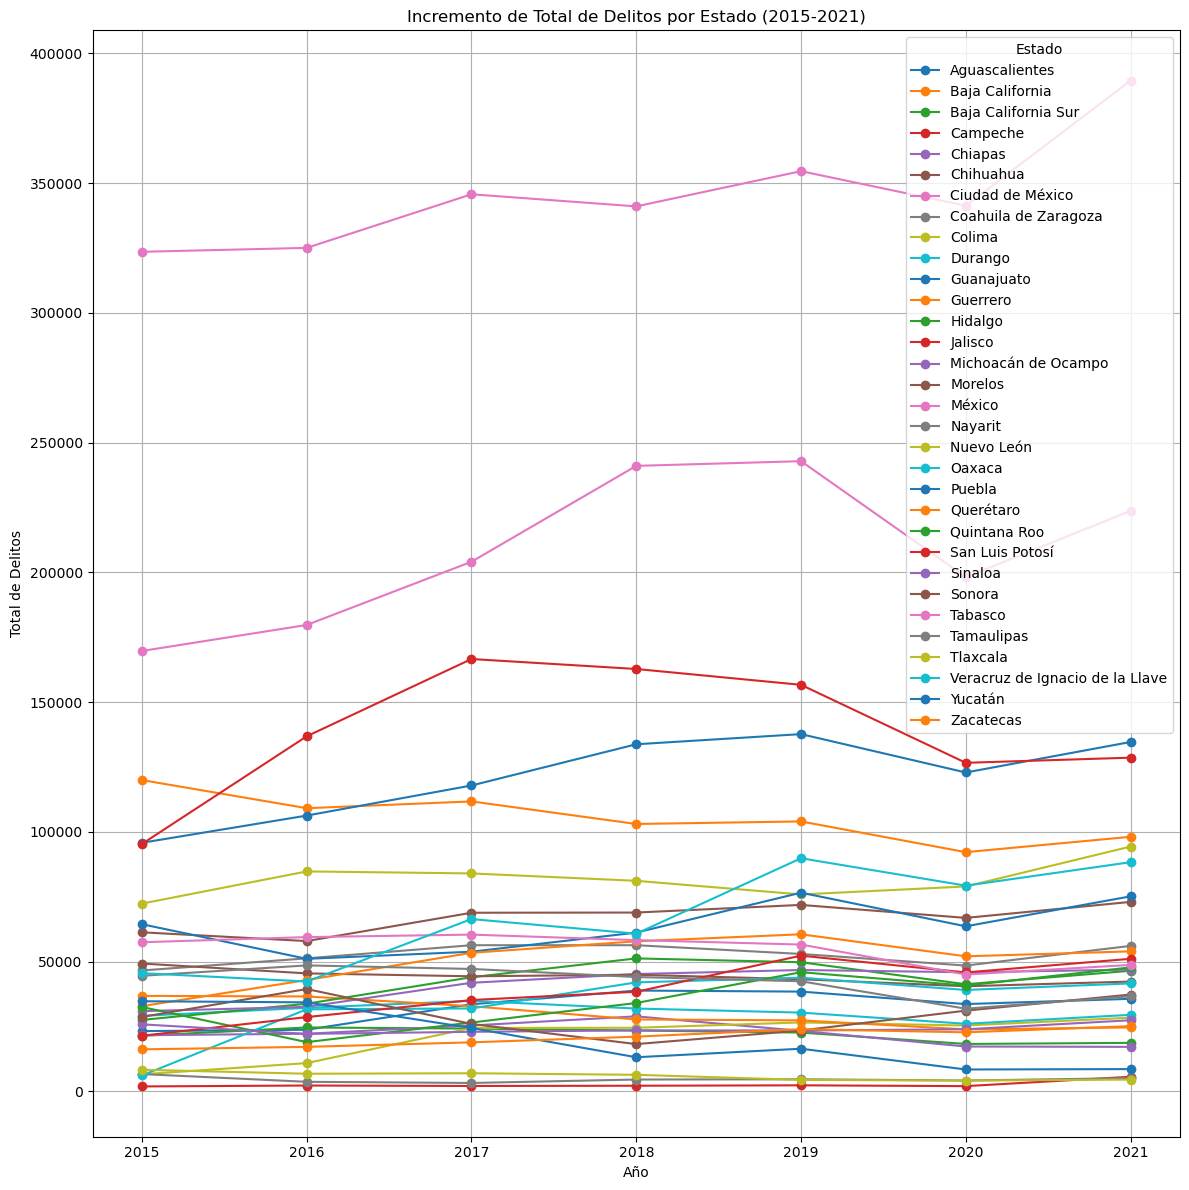

In [105]:

plt.figure(figsize=(12, 12))

# Graficar cada estado
for state in filtered_crime_data['Entidad'].unique():
    state_data = filtered_crime_data[filtered_crime_data['Entidad'] == state]
    plt.plot(state_data['Año'], state_data['Total Delitos'], marker='o', label=state)


plt.title('Incremento de Total de Delitos por Estado (2015-2021)')
plt.xlabel('Año')
plt.ylabel('Total de Delitos')
plt.xticks(range(2015, 2022))  
plt.legend(title='Estado')
plt.grid()
plt.tight_layout() 


plt.show()

In [106]:

total_crimes_by_state_2 = filtered_crime_data.groupby('Entidad')['Total Delitos'].sum().reset_index()

# Ordenar por Total Delitos de mayor a menor
top_5_states_n = total_crimes_by_state_2.nlargest(5, 'Total Delitos')

print("Top 5 Estados con Más Delitos:")
top_5_states_n

Top 5 Estados con Más Delitos:


,Entidad,Total Delitos
16,México,2420657.0
6,Ciudad de México,1459213.0
13,Jalisco,973345.0
10,Guanajuato,848807.0
1,Baja California,738069.0


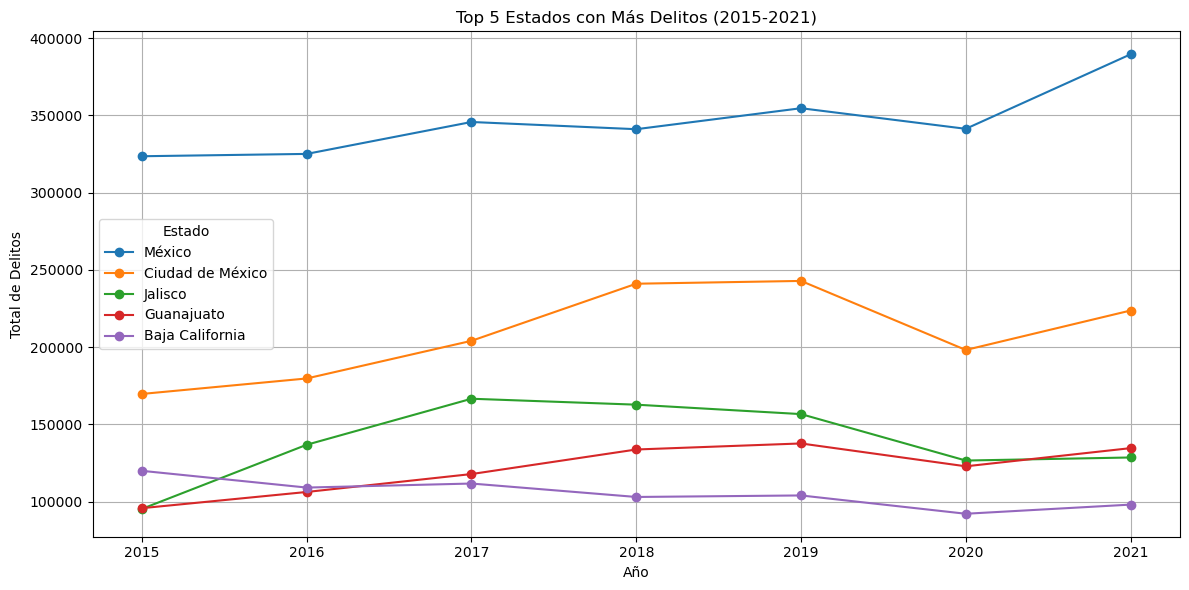

In [107]:
# Crear la gráfica de línea para los 5 estados con más delitos
plt.figure(figsize=(12, 6))

# Graficar cada estado en la selección top 5
for state in top_5_states_n['Entidad']:
    state_data = filtered_crime_data[filtered_crime_data['Entidad'] == state]
    plt.plot(state_data['Año'], state_data['Total Delitos'], marker='o', label=state)

# Añadir detalles a la gráfica
plt.title('Top 5 Estados con Más Delitos (2015-2021)')
plt.xlabel('Año')
plt.ylabel('Total de Delitos')
plt.xticks(range(2015, 2022))  # Mostrar los años en el eje x
plt.legend(title='Estado')
plt.grid()
plt.tight_layout()  # Ajusta la disposición para evitar superposición

# Mostrar la gráfica
plt.show()

In [108]:
least_5_states = total_crimes_by_state_2.nsmallest(5, 'Total Delitos')

print("Top 5 Estados con Menos Delitos 2015 a 2021:")
least_5_states

Top 5 Estados con Menos Delitos 2015 a 2021:


,Entidad,Total Delitos
3,Campeche,18262.0
17,Nayarit,31963.0
28,Tlaxcala,41504.0
30,Yucatán,139924.0
31,Zacatecas,145063.0


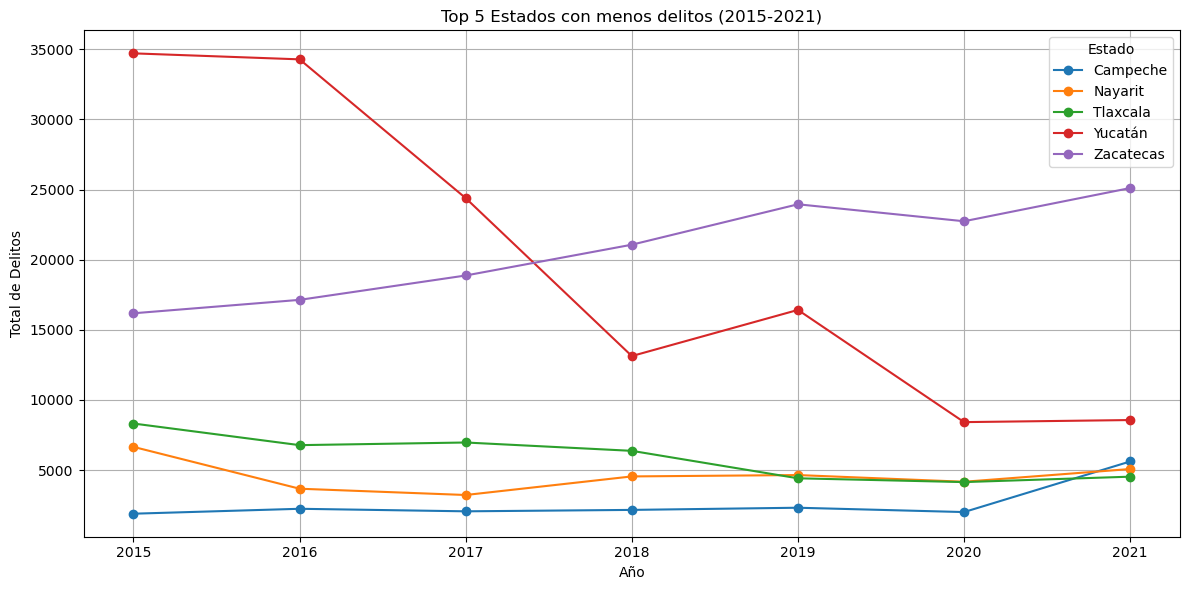

In [109]:
# Crear la gráfica de línea para los 5 estados con menos delitos
plt.figure(figsize=(12, 6))

for state in least_5_states['Entidad']:
    state_data = filtered_crime_data[filtered_crime_data['Entidad'] == state]
    plt.plot(state_data['Año'], state_data['Total Delitos'], marker='o', label=state)

# Añadir detalles a la gráfica
plt.title('Top 5 Estados con menos delitos (2015-2021)')
plt.xlabel('Año')
plt.ylabel('Total de Delitos')
plt.xticks(range(2015, 2022))  # Mostrar los años en el eje x
plt.legend(title='Estado')
plt.grid()
plt.tight_layout()  

plt.show()

In [110]:
crime_data_2 = filtered_crime_data.drop(columns=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 
                 'Junio', 'Julio', 'Agosto', 'Septiembre', 
                 'Octubre', 'Noviembre', 'Diciembre'])
crime_data_2.head(20)

,Entidad,Año,Total Delitos
0,Aguascalientes,2015,23212.0
1,Aguascalientes,2016,23729.0
2,Aguascalientes,2017,33548.0
3,Aguascalientes,2018,38834.0
4,Aguascalientes,2019,38429.0
5,Aguascalientes,2020,33626.0
6,Aguascalientes,2021,35645.0
8,Baja California,2015,119944.0
9,Baja California,2016,109109.0
10,Baja California,2017,111722.0


In [111]:
crime_data_2renamed = crime_data_2.rename(columns={"Entidad":"State", "Año":"Year", "Total Delitos": "Total Crime"})
crime_data_2renamed.head(20)

,State,Year,Total Crime
0,Aguascalientes,2015,23212.0
1,Aguascalientes,2016,23729.0
2,Aguascalientes,2017,33548.0
3,Aguascalientes,2018,38834.0
4,Aguascalientes,2019,38429.0
5,Aguascalientes,2020,33626.0
6,Aguascalientes,2021,35645.0
8,Baja California,2015,119944.0
9,Baja California,2016,109109.0
10,Baja California,2017,111722.0


In [112]:
crime_data_2.to_csv("Resources/new_crime_data_2.csv", index_label="State")

In [113]:
total_crimes_by_entityeng_df = total_crimes_by_entity.rename(columns={"Entidad":"State", "Año":"Year","Enero":"January", "Febrero":"February", "Marzo":"March", "Abril":"April","Mayo":"May","Junio":"June", "Julio":"July", "Agosto":"August", "Septiembre":"September", "Octubre":"October", "Noviembre":"November", "Diciembre":"December", "Total Delitos": "Total Crime"})

print("\nDataFrame Grouped by Entity and Year with Total Crimes")
total_crimes_by_entityeng_df.head(20)


DataFrame Grouped by Entity and Year with Total Crimes


,State,Year,January,February,March,April,May,June,July,August,September,October,November,December,Total Crime
0,Aguascalientes,2015,1855,1816,2009,1978,1936,1979.0,1973.0,1963.0,1919.0,1914.0,1941.0,1929.0,23212.0
1,Aguascalientes,2016,1786,1738,1888,2050,2027,1716.0,2049.0,2065.0,2045.0,2286.0,2025.0,2054.0,23729.0
2,Aguascalientes,2017,2109,1933,2212,2021,2805,3339.0,2962.0,3339.0,3384.0,3409.0,3220.0,2815.0,33548.0
3,Aguascalientes,2018,2982,2864,3327,3427,3572,3075.0,3742.0,3486.0,3118.0,3390.0,2960.0,2891.0,38834.0
4,Aguascalientes,2019,2916,2768,3236,3421,3497,3261.0,3392.0,3464.0,3302.0,3306.0,3054.0,2812.0,38429.0
5,Aguascalientes,2020,3254,3183,3429,2085,2305,2951.0,2924.0,2730.0,2735.0,2917.0,2473.0,2640.0,33626.0
6,Aguascalientes,2021,2789,2730,3263,2979,3149,3041.0,2931.0,3039.0,3069.0,3039.0,2844.0,2772.0,35645.0
7,Aguascalientes,2022,2882,2995,3456,3308,3538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16179.0
8,Baja California,2015,9261,8620,10065,9504,9945,10651.0,10695.0,10861.0,10465.0,10621.0,9731.0,9525.0,119944.0
9,Baja California,2016,9055,9288,9319,9374,9600,8673.0,8424.0,9270.0,8940.0,9544.0,8540.0,9082.0,109109.0


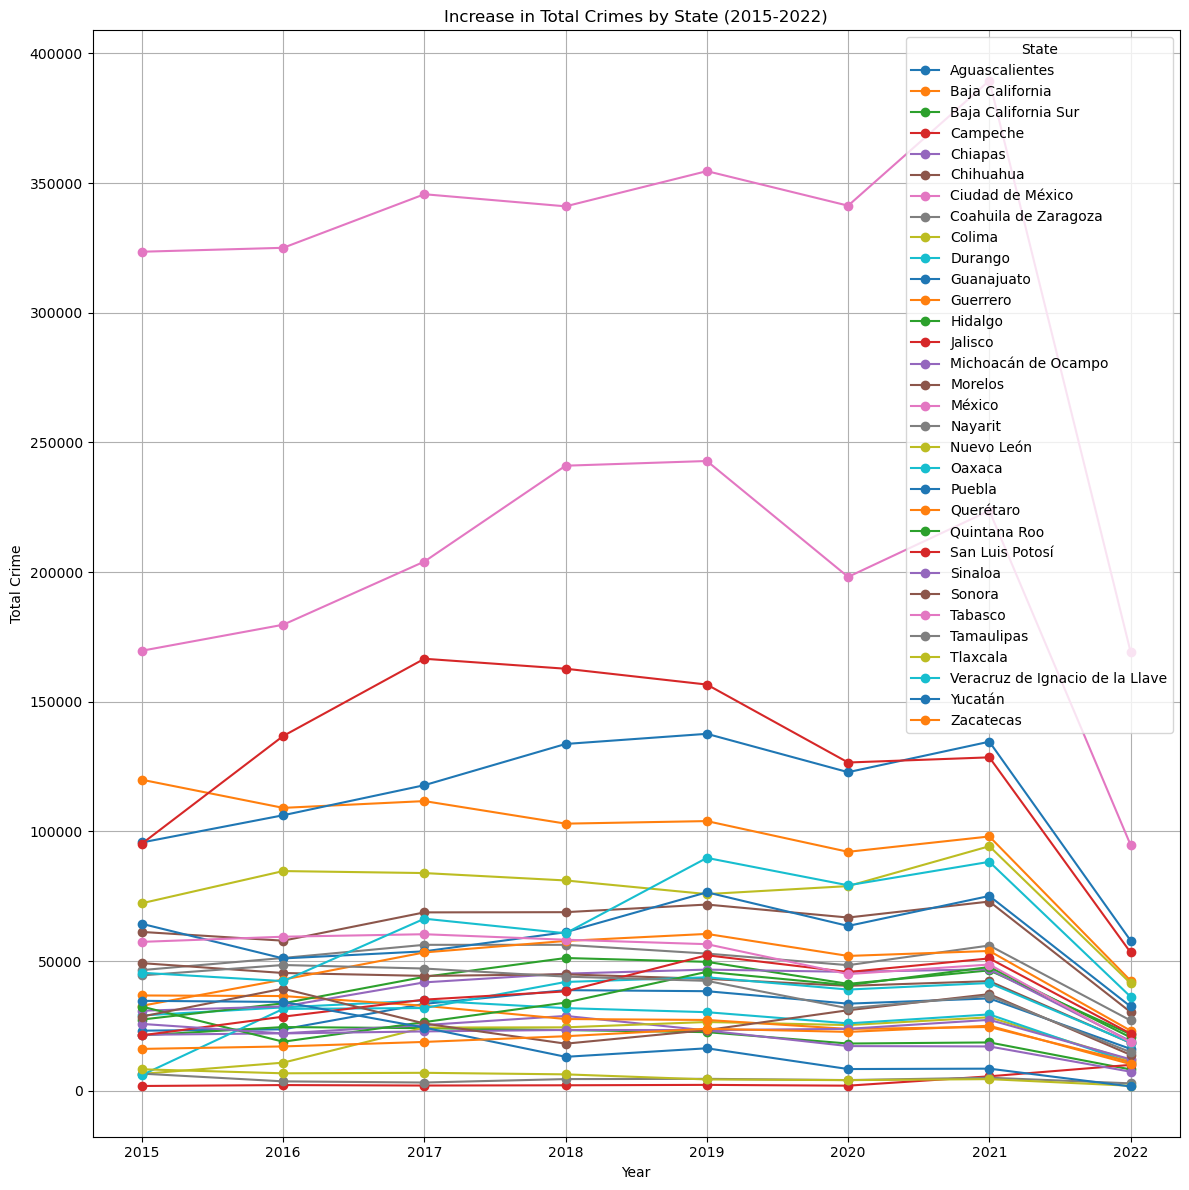

In [114]:
# Crear la gráfica de línea
plt.figure(figsize=(12, 12))

# Graficar cada estado
for state in total_crimes_by_entityeng_df['State'].unique():
    state_data = total_crimes_by_entityeng_df[total_crimes_by_entityeng_df['State'] == state]
    plt.plot(state_data['Year'], state_data['Total Crime'], marker='o', label=state)


plt.title('Increase in Total Crimes by State (2015-2022)')
plt.xlabel('Year')
plt.ylabel('Total Crime')
plt.xticks(range(2015, 2023)) 
plt.legend(title='State')
plt.grid()
plt.tight_layout()  

# Mostrar la gráfica
plt.show()

In [115]:

total_crimes_by_state_eng = total_crimes_by_entityeng_df.groupby('State')['Total Crime'].sum().reset_index()

# Ordenar por Total Delitos de mayor a menor
top_5_states = total_crimes_by_state_eng.nlargest(5, 'Total Crime')

# Mostrar los 5 estados con más delitos
print("Top 5 States with the Most Crimes:")
print(top_5_states)

Top 5 States with the Most Crimes:
               State  Total Crime
16            México    2589956.0
6   Ciudad de México    1554042.0
13           Jalisco    1026730.0
10        Guanajuato     906771.0
1    Baja California     780562.0


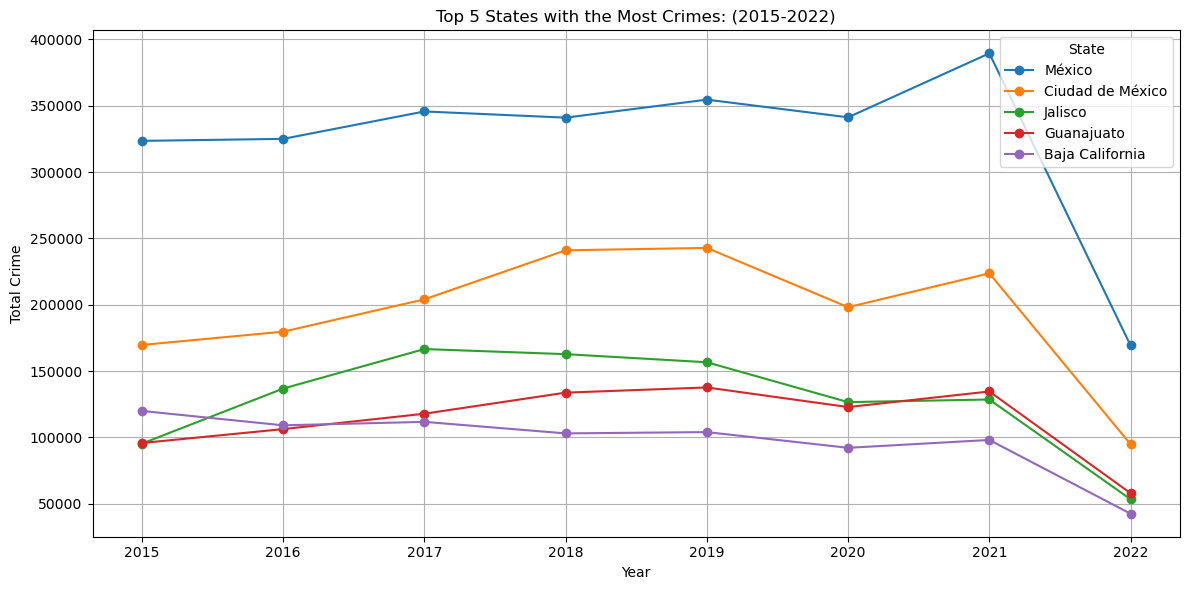

In [116]:
# Crear la gráfica de línea para los 5 estados con más delitos
plt.figure(figsize=(12, 6))

# Graficar cada estado en la selección top 5
for state in top_5_states['State']:
    state_data = total_crimes_by_entityeng_df[total_crimes_by_entityeng_df['State'] == state]
    plt.plot(state_data['Year'], state_data['Total Crime'], marker='o', label=state)

plt.title('Top 5 States with the Most Crimes: (2015-2022)')
plt.xlabel('Year')
plt.ylabel('Total Crime')
plt.xticks(range(2015, 2023))  
plt.legend(title='State')
plt.grid()
plt.tight_layout() 


plt.show()

In [117]:
filtered_crime_data = total_crimes_by_entityeng_df[(total_crimes_by_entityeng_df['Year'] >= 2015) & (total_crimes_by_entityeng_df['Year'] <= 2021)]


print("\nDataFrame Filtered (2015 to 2021):")
filtered_crime_data.head(20)


DataFrame Filtered (2015 to 2021):


,State,Year,January,February,March,April,May,June,July,August,September,October,November,December,Total Crime
0,Aguascalientes,2015,1855,1816,2009,1978,1936,1979.0,1973.0,1963.0,1919.0,1914.0,1941.0,1929.0,23212.0
1,Aguascalientes,2016,1786,1738,1888,2050,2027,1716.0,2049.0,2065.0,2045.0,2286.0,2025.0,2054.0,23729.0
2,Aguascalientes,2017,2109,1933,2212,2021,2805,3339.0,2962.0,3339.0,3384.0,3409.0,3220.0,2815.0,33548.0
3,Aguascalientes,2018,2982,2864,3327,3427,3572,3075.0,3742.0,3486.0,3118.0,3390.0,2960.0,2891.0,38834.0
4,Aguascalientes,2019,2916,2768,3236,3421,3497,3261.0,3392.0,3464.0,3302.0,3306.0,3054.0,2812.0,38429.0
5,Aguascalientes,2020,3254,3183,3429,2085,2305,2951.0,2924.0,2730.0,2735.0,2917.0,2473.0,2640.0,33626.0
6,Aguascalientes,2021,2789,2730,3263,2979,3149,3041.0,2931.0,3039.0,3069.0,3039.0,2844.0,2772.0,35645.0
8,Baja California,2015,9261,8620,10065,9504,9945,10651.0,10695.0,10861.0,10465.0,10621.0,9731.0,9525.0,119944.0
9,Baja California,2016,9055,9288,9319,9374,9600,8673.0,8424.0,9270.0,8940.0,9544.0,8540.0,9082.0,109109.0
10,Baja California,2017,8963,8244,9963,9669,9830,9397.0,9791.0,9881.0,9502.0,9301.0,8747.0,8434.0,111722.0


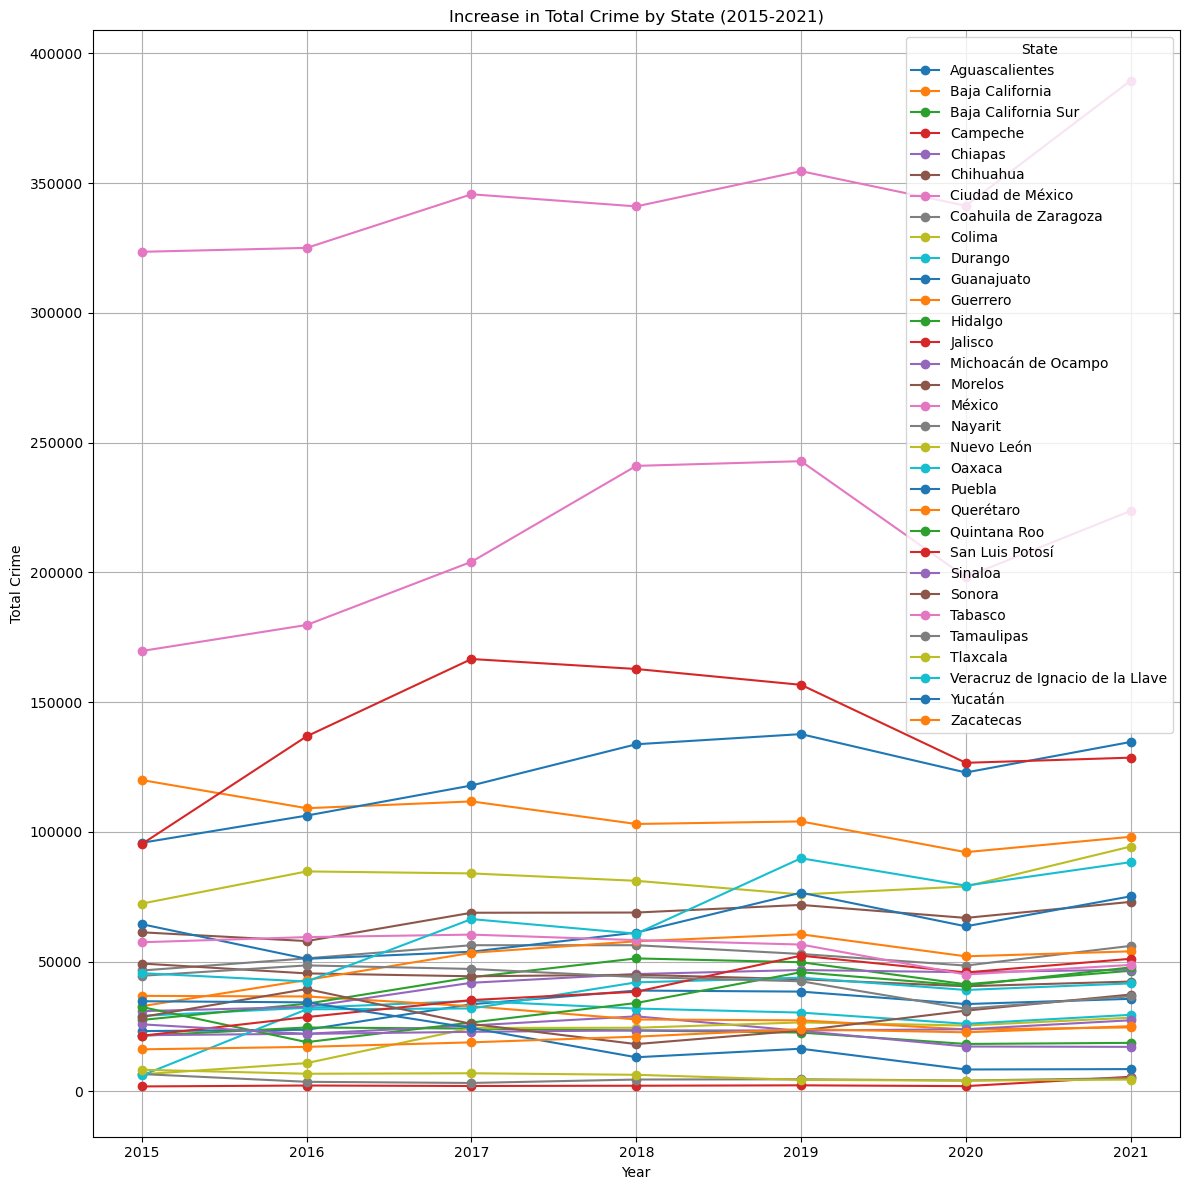

In [118]:

plt.figure(figsize=(12, 12))

# Graficar cada estado
for state in filtered_crime_data['State'].unique():
    state_data = filtered_crime_data[filtered_crime_data['State'] == state]
    plt.plot(state_data['Year'], state_data['Total Crime'], marker='o', label=state)


plt.title('Increase in Total Crime by State (2015-2021)')
plt.xlabel('Year')
plt.ylabel('Total Crime')
plt.xticks(range(2015, 2022))  
plt.legend(title='State')
plt.grid()
plt.tight_layout() 


plt.show()

In [119]:

total_crimes_by_state_2 = filtered_crime_data.groupby('State')['Total Crime'].sum().reset_index()

# Ordenar por Total Delitos de mayor a menor
top_5_states_n = total_crimes_by_state_2.nlargest(5, 'Total Crime')

print("Top 5 states with Most Crimes (2015-2021)")
top_5_states_n

Top 5 states with Most Crimes (2015-2021)


,State,Total Crime
16,México,2420657.0
6,Ciudad de México,1459213.0
13,Jalisco,973345.0
10,Guanajuato,848807.0
1,Baja California,738069.0


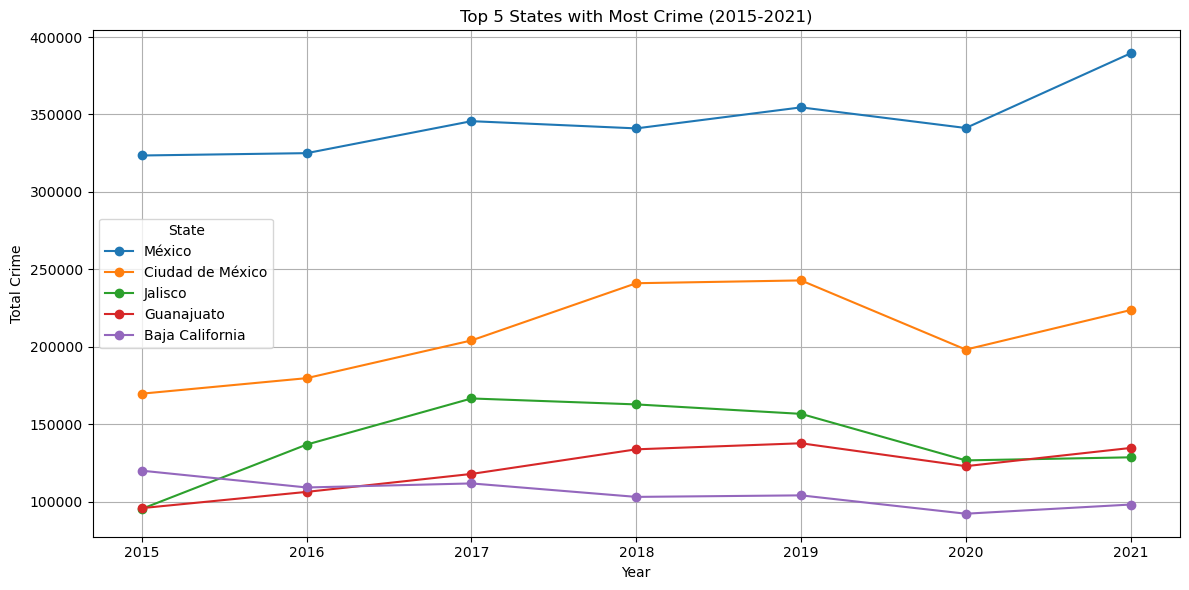

In [120]:
# Crear la gráfica de línea para los 5 estados con más delitos
plt.figure(figsize=(12, 6))

# Graficar cada estado en la selección top 5
for state in top_5_states_n['State']:
    state_data = filtered_crime_data[filtered_crime_data['State'] == state]
    plt.plot(state_data['Year'], state_data['Total Crime'], marker='o', label=state)

# Añadir detalles a la gráfica
plt.title('Top 5 States with Most Crime (2015-2021)')
plt.xlabel('Year')
plt.ylabel('Total Crime')
plt.xticks(range(2015, 2022))  # Mostrar los años en el eje x
plt.legend(title='State')
plt.grid()
plt.tight_layout()  # Ajusta la disposición para evitar superposición

# Mostrar la gráfica
plt.show()

In [121]:
least_5_states = total_crimes_by_state_2.nsmallest(5, 'Total Crime')

print("Top 5 States with Least Crimes (2015-2021)")
least_5_states

Top 5 States with Least Crimes (2015-2021)


,State,Total Crime
3,Campeche,18262.0
17,Nayarit,31963.0
28,Tlaxcala,41504.0
30,Yucatán,139924.0
31,Zacatecas,145063.0


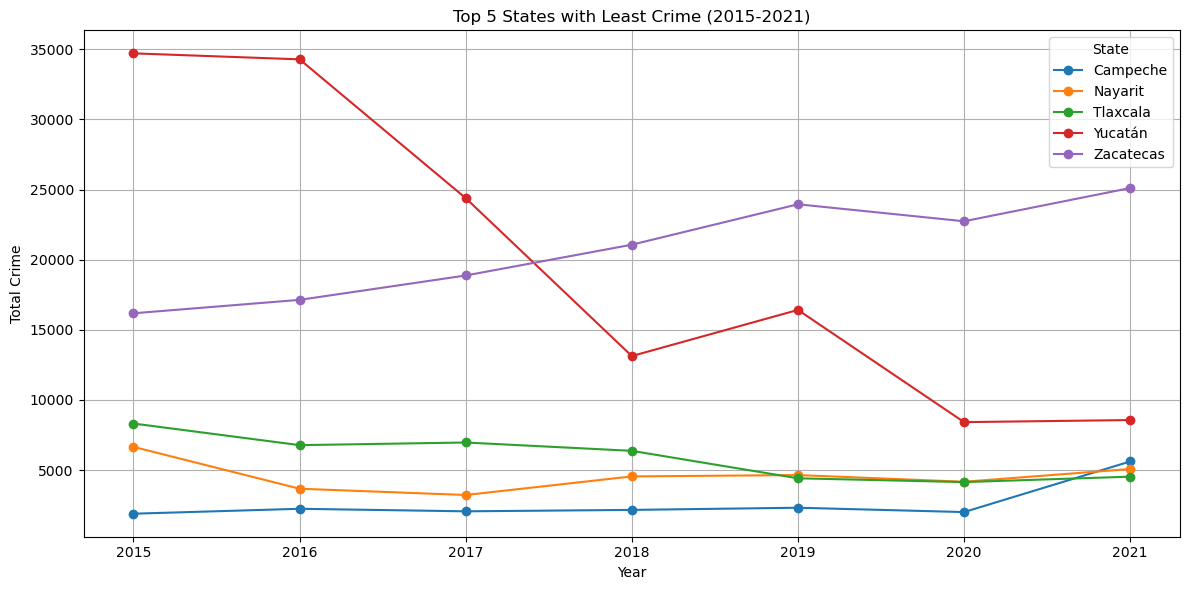

In [122]:
# Crear la gráfica de línea para los 5 estados con menos delitos
plt.figure(figsize=(12, 6))

for state in least_5_states['State']:
    state_data = filtered_crime_data[filtered_crime_data['State'] == state]
    plt.plot(state_data['Year'], state_data['Total Crime'], marker='o', label=state)

# Añadir detalles a la gráfica
plt.title('Top 5 States with Least Crime (2015-2021)')
plt.xlabel('Year')
plt.ylabel('Total Crime')
plt.xticks(range(2015, 2022))  # Mostrar los años en el eje x
plt.legend(title='State')
plt.grid()
plt.tight_layout()  

plt.show()

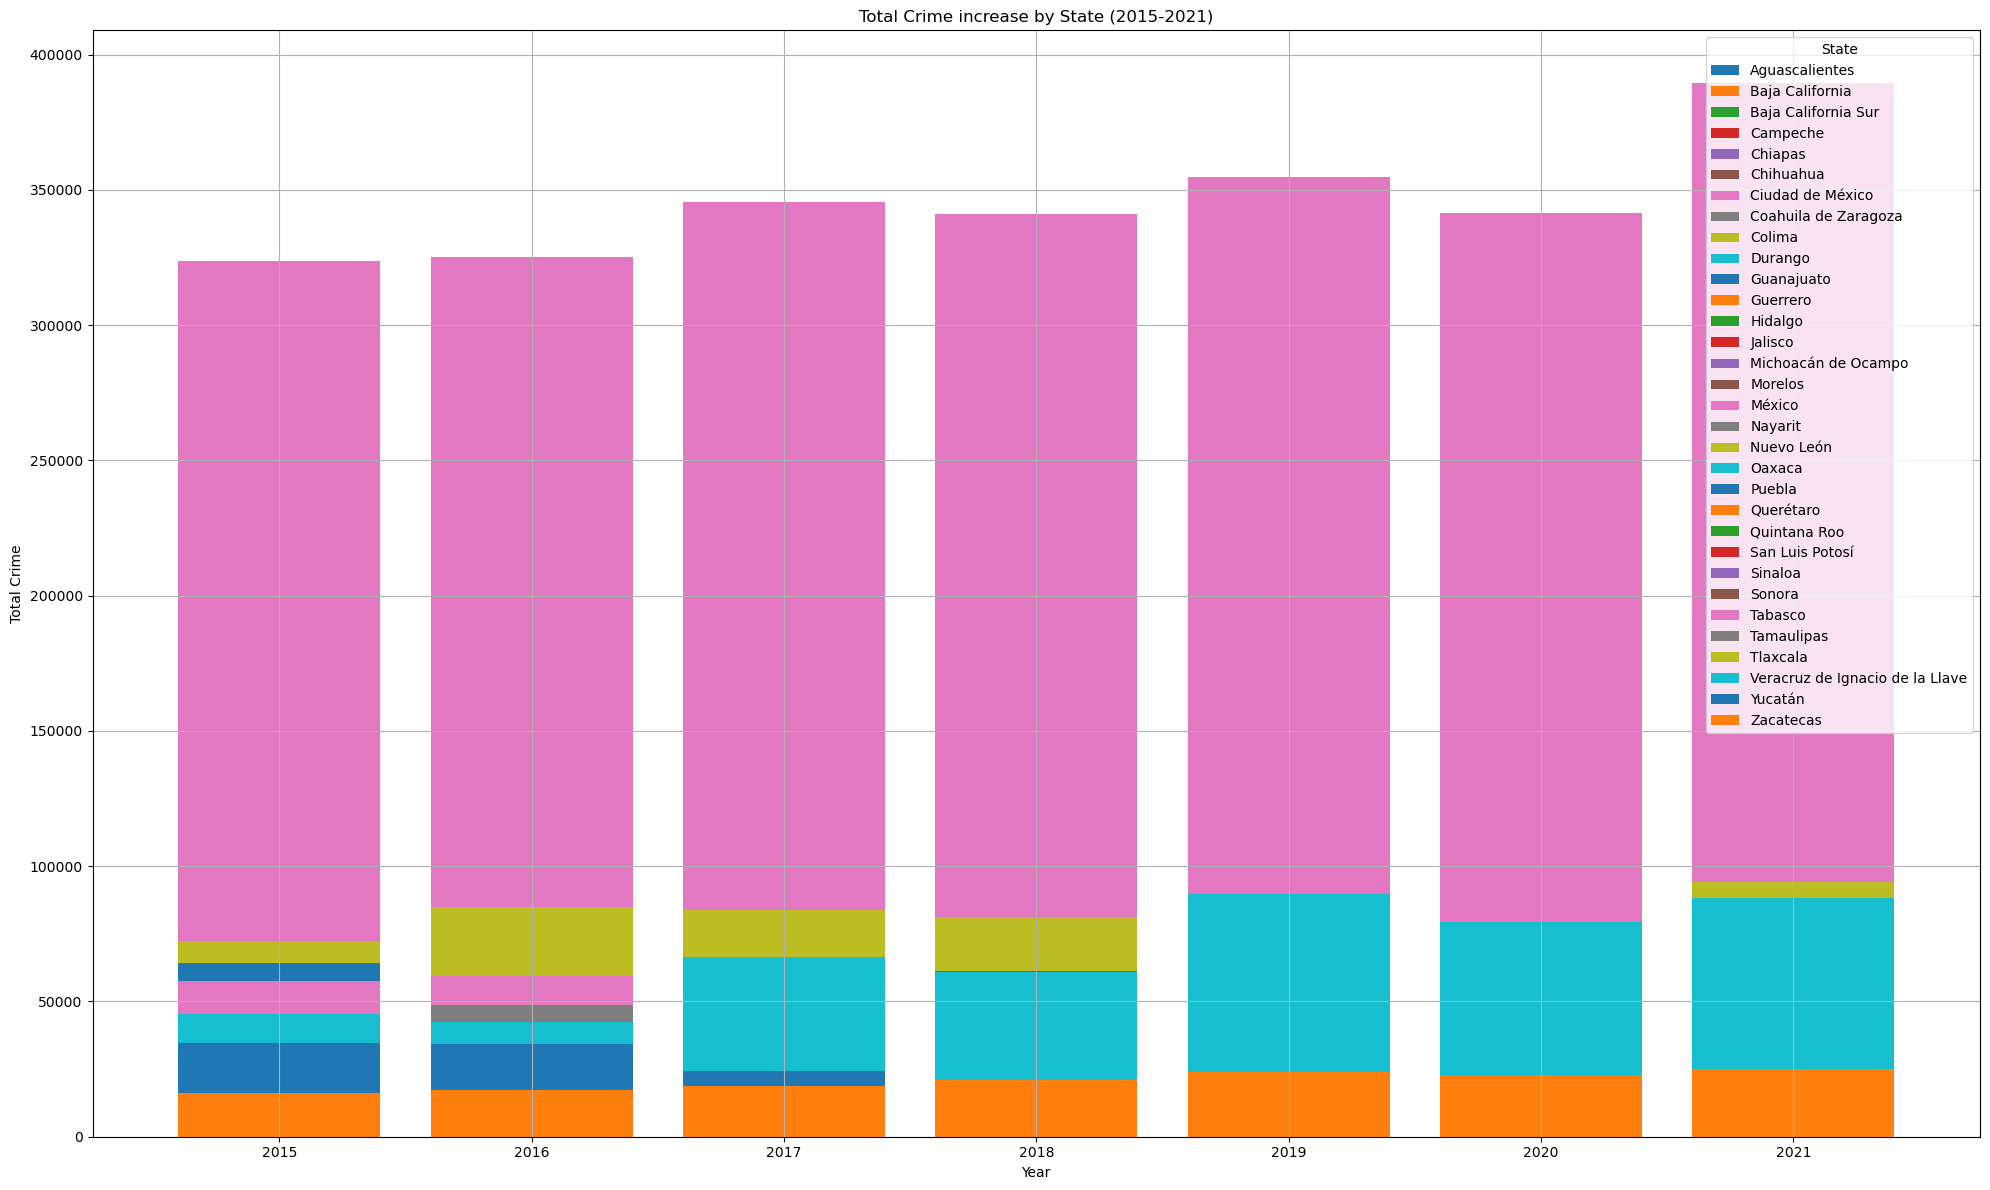

In [123]:
# Crear la gráfica de barra con total de crimenes por estado

plt.figure(figsize=(20, 12))

# Graficar cada estado
for state in filtered_crime_data['State'].unique():
    state_data = filtered_crime_data[filtered_crime_data['State'] == state]
    plt.bar(state_data['Year'], state_data['Total Crime'],  label=state)


plt.title('Total Crime increase by State (2015-2021)')
plt.xlabel('Year')
plt.ylabel('Total Crime')
plt.xticks(range(2015, 2022)) 
plt.legend(title='State')
plt.grid()
plt.tight_layout()  

# Mostrar la gráfica
plt.show()